In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import pystan
plt.style.use('ggplot')

In [2]:
hits_code = """

data {
    int<lower=0> visits; // number of visits
    int<lower=0> hits; // number of hits
}

transformed data{}

parameters {
    real<lower=0, upper=1> p; // probability of hits
}

transformed parameters{}

model {
    p ~ beta(2, 2);
    hits ~ binomial(visits, p);
}

generated quantities {}
"""

A_data = {
    'visits': 1058,
    'hits': 52,
}

B_data = {
    'visits': 1470,
    'hits': 112,
}

A_fit = pystan.stan(model_code=hits_code, data=A_data, iter=2000, chains=1)
B_fit = pystan.stan(fit=A_fit, data=B_data, iter=2000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8afa92c554f0634af7924dc6db88826f NOW.


In [3]:
print(A_fit)

Inference for Stan model: anon_model_8afa92c554f0634af7924dc6db88826f.
1 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.05  2.4e-4 6.6e-3   0.04   0.05   0.05   0.06   0.06    766   1.01
lp__ -213.9    0.03    0.7 -215.9 -214.1 -213.7 -213.5 -213.4    401   1.02

Samples were drawn using NUTS at Sun Mar 19 19:02:08 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [4]:
print(B_fit)

Inference for Stan model: anon_model_8afa92c554f0634af7924dc6db88826f.
1 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.08  3.3e-4 7.3e-3   0.06   0.07   0.08   0.08   0.09    476    1.0
lp__ -401.8    0.03   0.71 -403.8 -402.0 -401.5 -401.3 -401.2    497    1.0

Samples were drawn using NUTS at Sun Mar 19 19:02:08 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


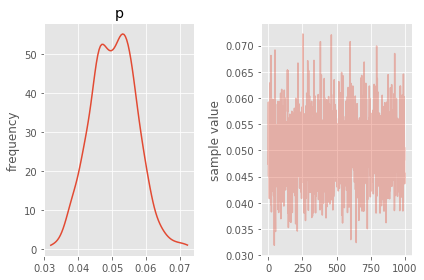

In [5]:
A_fit.plot('p');
plt.tight_layout()

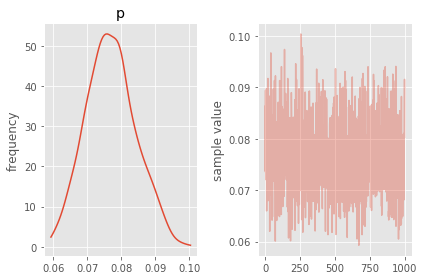

In [6]:
B_fit.plot('p');
plt.tight_layout()

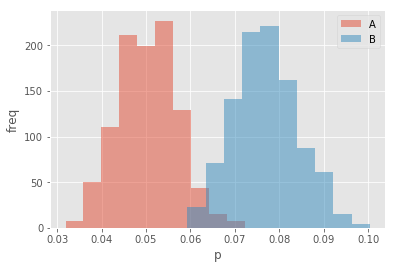

In [7]:
A_pos = A_fit.extract('p')['p']
B_pos = B_fit.extract('p')['p']
plt.hist(A_pos, alpha=0.5, label='A')
plt.hist(B_pos, alpha=0.5, label='B')
plt.xlabel('p')
plt.ylabel('freq')
plt.legend(loc='upper right')

In [8]:
np.sum(A_pos < B_pos) / A_pos.size # probability of p_B > p_A

0.998

In [14]:
# Hierarchical Model

hierarchical_hits_code = """
data {
    int<lower=1> N; // number of variants
    int<lower=0> visits[N]; // number of visits
    int<lower=0> hits[N]; // number of hits
}

transformed data{}

parameters {
    real<lower=0> a; // lower parameter of the beta distribution
    real<lower=0> b; // upper parameter of the beta distribution
    real<lower=0, upper=1> p[N]; // probability of hits
}

transformed parameters{}

model {
    a ~ beta(2, 2);
    b ~ beta(2, 2);
    p ~ beta(a, b);
    for (i in 1:N)
        hits[i] ~ binomial(visits[i], p[i]);
}

generated quantities {}
"""

hierarchical_data = {
    'N': 2,
    'visits': [1058, 1470],
    'hits': [52, 112],
}

fit = pystan.stan(model_code=hierarchical_hits_code, data=hierarchical_data, iter=2000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7db526aedbdff67c938edeb90c67bfb2 NOW.


In [15]:
print(fit)

Inference for Stan model: anon_model_7db526aedbdff67c938edeb90c67bfb2.
1 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      0.44  9.1e-3   0.19   0.11    0.3   0.42   0.57   0.84    437    1.0
b      0.61    0.01   0.19   0.21   0.47   0.62   0.75   0.93    273   1.01
p[0]   0.05  3.0e-4 6.8e-3   0.04   0.05   0.05   0.06   0.06    500    1.0
p[1]   0.08  3.0e-4 7.0e-3   0.06   0.07   0.08   0.08   0.09    527    1.0
lp__ -614.1    0.09   1.54 -618.1 -614.7 -613.8 -613.0 -612.2    270    1.0

Samples were drawn using NUTS at Sun Mar 19 19:14:41 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


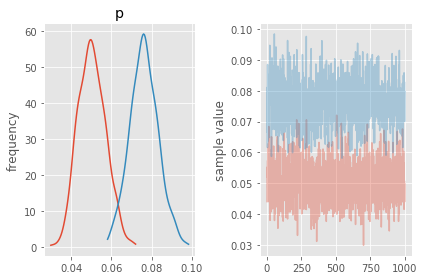

In [16]:
fit.plot('p');
plt.tight_layout()